<a href="https://colab.research.google.com/github/yh08037/KNU-DeepLearning/blob/master/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive 마운트 / 파일 입출력 스트림 테스트

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

with open('/content/gdrive/My Drive/Colab Notebooks/Result/fwtest.txt', 'w') as f:
    f.write('Hello Google Drive!')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Tensor 선언

In [0]:
import tensorflow as tf
zero_tsr = tf.zeros([2, 3])
print(zero_tsr)

Tensor("zeros:0", shape=(2, 3), dtype=float32)


In [0]:
import tensorflow as tf
import numpy as np
sess = tf.Session()

row_dim = 2
col_dim = 3
zero_tsr = tf.zeros([row_dim, col_dim])
ones_tsr = tf.ones([row_dim, col_dim])
filled_tsr = tf.fill([row_dim, col_dim], 42)
constant_tsr = tf.constant([1, 2, 3])
print(zero_tsr, ones_tsr, '\n', filled_tsr, '\n', constant_tsr)
print(sess.run(zero_tsr),'\n', '\n',  sess.run(ones_tsr),'\n', '\n',  sess.run(filled_tsr),'\n', '\n',  sess.run(constant_tsr))

Tensor("zeros_6:0", shape=(2, 3), dtype=float32) Tensor("ones_3:0", shape=(2, 3), dtype=float32) 
 Tensor("Fill_2:0", shape=(2, 3), dtype=int32) 
 Tensor("Const_2:0", shape=(3,), dtype=int32)
[[0. 0. 0.]
 [0. 0. 0.]] 
 
 [[1. 1. 1.]
 [1. 1. 1.]] 
 
 [[42 42 42]
 [42 42 42]] 
 
 [1 2 3]


In [0]:
randunif_tsr = tf.random_uniform([row_dim, col_dim], minval = 0, maxval = 1)
print(randunif_tsr)
print(sess.run(randunif_tsr))

Tensor("random_uniform:0", shape=(2, 3), dtype=float32)
[[0.3110211  0.83692193 0.22590756]
 [0.27713573 0.8263614  0.8187995 ]]


In [0]:
randnorm_tsr = tf.random_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
print(randnorm_tsr)
print(sess.run(randnorm_tsr))

Tensor("random_normal:0", shape=(2, 3), dtype=float32)
[[-0.7521208  -1.2719902   1.9730028 ]
 [ 0.22249623  0.04087675  0.50950027]]


In [0]:
truncnorm_tsr = tf.truncated_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
print(truncnorm_tsr)
print(sess.run(truncnorm_tsr))

Tensor("truncated_normal:0", shape=(2, 3), dtype=float32)
[[-0.89141214 -1.9242679  -0.02932663]
 [-0.12771073  0.6279698   0.34238863]]


# Placeholder

In [0]:
import math as m

# variable declaration and initailization
my_var = tf.Variable(tf.zeros([2, 3]))
initialize_op = tf.global_variables_initializer()
sess.run(initialize_op)
print(sess.run(my_var))

# placeholder declaration and feed_dict
x = tf.placeholder(tf.float32, shape=[2, 2])
y = tf.identity(x)
x_vals = np.random.rand(2, 2)
print(sess.run(y, feed_dict={x: x_vals}))

[[0. 0. 0.]
 [0. 0. 0.]]
[[0.10914526 0.32817954]
 [0.5500483  0.45365188]]


# ActFunction

Tensor("LinSpace:0", shape=(10,), dtype=float32)
[-3.         -2.3333333  -1.6666666  -0.99999994 -0.33333325  0.33333343
  1.0000001   1.6666667   2.3333335   3.0000002 ]


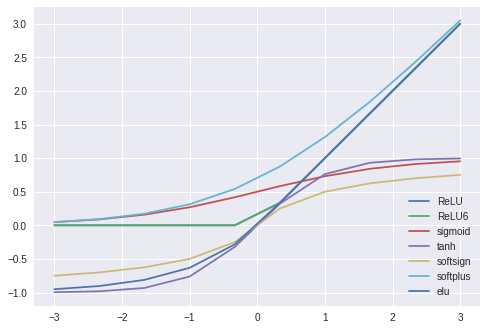

In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn
sess = tf.Session()

# Activation Functions
x=tf.linspace(start=-3.0, stop=3.0, num=10)
print(x)
print(sess.run(x))

y1=nn.relu(x)
plt.plot(sess.run(x), sess.run(y1), label='ReLU')
y2=nn.relu6(x)
plt.plot(sess.run(x), sess.run(y2), label='ReLU6')
y3=nn.sigmoid(x)
plt.plot(sess.run(x), sess.run(y3), label='sigmoid')
y4=nn.tanh(x)
plt.plot(sess.run(x), sess.run(y4), label='tanh')
y5=nn.softsign(x)
plt.plot(sess.run(x), sess.run(y5), label='softsign')
y6=nn.softplus(x)
plt.plot(sess.run(x), sess.run(y6), label='softplus')
y7=nn.elu(x)
plt.plot(sess.run(x), sess.run(y7), label='elu')

plt.legend(loc='lower right')

# Layering

In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn

sess = tf.Session()

# Layering Nested Operations
my_array = np.array([[1., 3., 5., 7., 9.], [-2.,0.,2.,4.,6.],[-6.,-3.,0.,3.,6.]])
x_vals = np.array([my_array, my_array+1])
print(x_vals, end="\n\n")

x_data=tf.placeholder(tf.float32, shape=np.shape(my_array))

m1=tf.constant([[1.],[0.],[-1.],[2.],[4]])
m2=tf.constant([[2.]])
a1=tf.constant([[10.]])

prod1=tf.matmul(x_data,m1)
prod2=tf.matmul(prod1,m2)
add1=tf.add(prod2,a1)

for x_val in x_vals:
    print(sess.run(add1,feed_dict={x_data:x_val}), end='\n\n')

[[[ 1.  3.  5.  7.  9.]
  [-2.  0.  2.  4.  6.]
  [-6. -3.  0.  3.  6.]]

 [[ 2.  4.  6.  8. 10.]
  [-1.  1.  3.  5.  7.]
  [-5. -2.  1.  4.  7.]]]

[[102.]
 [ 66.]
 [ 58.]]

[[114.]
 [ 78.]
 [ 70.]]



# Loss Function

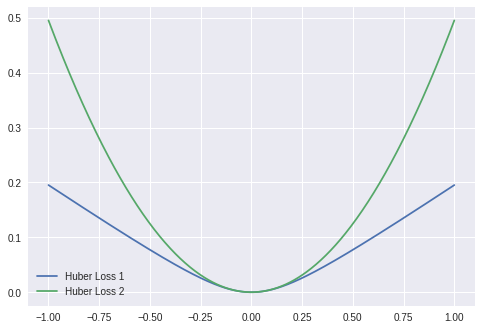

In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn
sess = tf.Session()

# Regression Loss
x_vals=tf.linspace(-1.,1.,500)
target=tf.constant(0.)

# L2 norm loss
l2_y_vals = tf.square(target-x_vals)
l2_y_out = sess.run(l2_y_vals)
l2_y_out_div2 = sess.run(nn.l2_loss(target-x_vals))

# L1 norm loss
l1_y_vals = tf.abs(target-x_vals)
l1_y_out = sess.run(l1_y_vals)

# Pseudo-Huber loss
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target-x_vals)/delta1))-1)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target-x_vals)/delta2))-1)
phuber2_y_out = sess.run(phuber2_y_vals)

plt.plot(sess.run(x_vals), phuber1_y_out,label='Huber Loss 1')
plt.plot(sess.run(x_vals), phuber2_y_out,label='Huber Loss 2')
plt.legend()

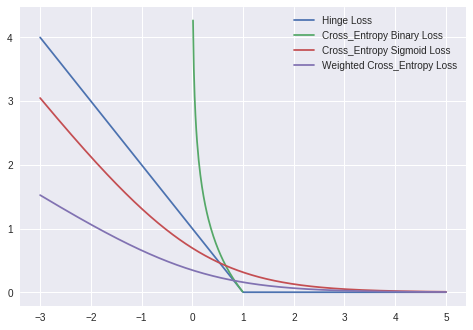

In [0]:
# Classification loss
x_vals = tf.linspace(-3.,5., 500)
target = tf.constant(1.)
targets = tf.fill([500,],1.)

# Hinge Loss
hinge_y_vals = tf.maximum(0., 1.-tf.multiply(target,x_vals))
hinge_y_out = sess.run(hinge_y_vals)

# Cross-entropy Loss for binary case
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1.-target), tf.log(1.-x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

# Sigmoid cross entropy loss
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=x_vals)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

# Weighted Cross-entropy Loss
weight=tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(targets, x_vals, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

plt.plot(sess.run(x_vals), hinge_y_out,label="Hinge Loss")
plt.plot(sess.run(x_vals), xentropy_y_out,label="Cross_Entropy Binary Loss")
plt.plot(sess.run(x_vals), xentropy_sigmoid_y_out,label="Cross_Entropy Sigmoid Loss")
plt.plot(sess.run(x_vals), xentropy_weighted_y_out,label="Weighted Cross_Entropy Loss")
plt.legend()

In [0]:
# Classification loss for multiple classes
# Softmax Cross-entropy Loss
unscaled_logits = tf.constant([[1.,-3.,10.]])
#target_dist = tf.constant([[0.1,0.02,0.88]])
target_dist = tf.constant([[0.0, 0.0, 1.0]]) # One-hot vector
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=target_dist, logits=unscaled_logits)
print(sess.run(softmax_xentropy))

# Sparse Softmax Cross-entropy Loss (one-hot version --> label output)
unscaled_logits = tf.constant([[1.,-3.,10.]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=sparse_target_dist,
logits=unscaled_logits)
print(sess.run(sparse_xentropy))

[0.00012564]
[0.00012564]


# Simple Linear Classifier

100 0.51119924
200 0.50481695
300 0.5021242
400 0.50093985
500 0.50041854
600 0.50018746
700 0.5000844
800 0.50003815
900 0.5000173
1000 0.50000787
1100 0.5000035
1200 0.5000016
1300 0.5000007
1400 0.50000036
1500 0.5000002
1600 0.50000006
1700 0.50000006
1800 0.5
1900 0.5
2000 0.50000006
2100 0.5
2200 0.5
2300 0.49999997
2400 0.5
2500 0.5
2600 0.5
2700 0.49999994
2800 0.5
2900 0.5
3000 0.5
3100 0.49999994
3200 0.5
3300 0.5
3400 0.5
3500 0.49999997
3600 0.49999994
3700 0.49999994
3800 0.49999994
3900 0.49999997
4000 0.49999997
4100 0.49999994
4200 0.5
4300 0.5
4400 0.5
4500 0.5
4600 0.5
4700 0.5
4800 0.5
4900 0.5
5000 0.5


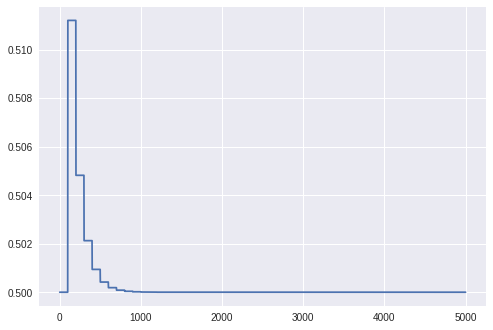

In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn

# Data Setup
x_data = np.array([[0,0],[1,0],[1,1],[0,1]])
y_data = np.array([[0],[1],[0],[1]])

# Model setting
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

W=tf.Variable(tf.random_uniform([2,1],-1.,1.)) # -1에서 1까지 2X1 크기 행렬
b=tf.Variable(tf.zeros([1]))

L=tf.add(tf.matmul(X,W),b)
L=tf.nn.sigmoid(L)

# loss and optimizer definition
loss = nn.l2_loss(Y-L)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

# initialize and learn
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_step=[]

for i in range(5000):
    sess.run(train_op, feed_dict={X:x_data, Y:y_data})
    if (i+1)%100 == 0:
        temp_loss = sess.run(loss, feed_dict={X:x_data, Y:y_data})
        print(i+1,temp_loss )
    loss_step.append(temp_loss)

plt.plot(loss_step)

W : 가중치 / b : bias / 
optimizer : 알고리즘 / learning_rate : 학습률

# Simple MLP

100 0.42819658
200 0.30650598
300 0.20156035
400 0.11757702
500 0.071009725
600 0.04393778
700 0.029925276
800 0.022053622
900 0.017126646
1000 0.01381718
1100 0.011496838
1200 0.009773998
1300 0.008474665
1400 0.0074554
1500 0.0066296076
1600 0.005960648
1700 0.005411154
1800 0.0049375547
1900 0.0045398893
2000 0.0041977307
2100 0.0038999268
2200 0.0036384594
2300 0.0034097056
2400 0.0032039308
2500 0.0030210156
2600 0.002855746
2700 0.0027078227
2800 0.0025727851
2900 0.0024505523
3000 0.0023382576
3100 0.0022353365
3200 0.0021411239
3300 0.0020536943
3400 0.0019727123
3500 0.0018976425
3600 0.0018282142
3700 0.0017624237
3800 0.0017012047
3900 0.0016442403
4000 0.0015909867
4100 0.0015406073
4200 0.0014929016
4300 0.0014483123
4400 0.0014061264
4500 0.0013660118
4600 0.0013280825
4700 0.0012924399
4800 0.0012580473
4900 0.0012256549
5000 0.0011953632


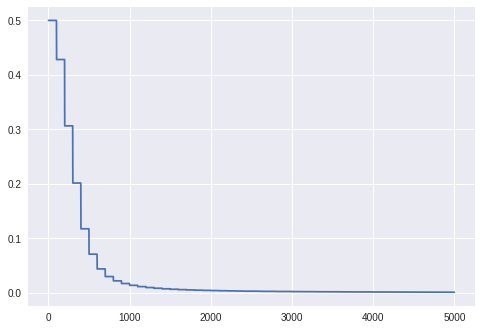

In [0]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn

# Data Setup
x_data = np.array([[0,0],[1,0],[1,1],[0,1]])
y_data = np.array([[0],[1],[0],[1]])

# Model setting
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

W1=tf.Variable(tf.random_uniform([2,5],-1.,1.))
b1=tf.Variable(tf.zeros([5]))

W2=tf.Variable(tf.random_uniform([5,1],-1.,1.))
b2=tf.Variable(tf.zeros([1]))

H=tf.nn.relu(tf.add(tf.matmul(X,W1),b1))

L=tf.nn.sigmoid(tf.add(tf.matmul(H,W2),b2))

model=tf.nn.sigmoid(L)

# loss and optimizer definition
loss = nn.l2_loss(Y-L)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

# initialize and learn
init=tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

loss_step=[]

for i in range(5000):
    sess.run(train_op, feed_dict={X:x_data, Y:y_data})
    if (i+1)%100 == 0:
        temp_loss = sess.run(loss, feed_dict={X:x_data, Y:y_data})
        print(i+1,temp_loss )
    loss_step.append(temp_loss)

    
plt.plot(loss_step)


W1 : 2 X 5 행렬, W2 : 5 X 1 행렬  $\Rightarrow$  x : 2개, hidden layer : 5개, y : 1개

H : 은닉 노드 

# MLP iris Regression

100 0.30593997 0.3700608
200 0.23188165 0.29509863
300 0.18616477 0.24822834
400 0.15774098 0.2185412
500 0.13992316 0.19904992
600 0.12864047 0.18610643
700 0.12139764 0.17736872
800 0.11665977 0.17130229
900 0.11347918 0.16694658
1000 0.111269735 0.16369708
1100 0.10963254 0.16114314
1200 0.10836121 0.15905558
1300 0.10734582 0.15730137
1400 0.10649349 0.15577392
1500 0.10574725 0.15440467
1600 0.105070084 0.15314764
1700 0.104438804 0.15197213
1800 0.10383897 0.15085742
1900 0.10326168 0.14978963
2000 0.10270129 0.14875928


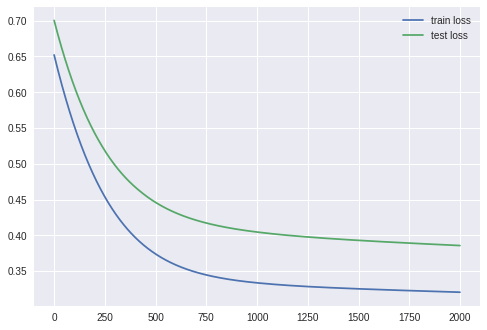

In [10]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn
from sklearn import datasets

# data set_up
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data]) # input
y_vals = np.array([x[3] for x in iris.data]) # target_output

# 80% for training, 20% for test
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]

y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# Input Data Normalization (from -1 to 1)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# Model set-up
x_data = tf.placeholder(shape=[None,3], dtype = tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype = tf.float32)

H_nodes = 10

W1 = tf.Variable(tf.random_normal(shape=[3,H_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[H_nodes]))

W2 = tf.Variable(tf.random_normal(shape=[H_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

H_out = tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))

L_out = tf.nn.relu(tf.add(tf.matmul(H_out,W2),b2))

# loss and optimizer definition
loss = tf.reduce_mean(tf.square(y_target - L_out))

#loss = tf.nn.l2_loss(y_target - L_out)
optimizer = tf.train.GradientDescentOptimizer(0.0001)
train_op = optimizer.minimize(loss)

# Running session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
loss_vec = []
test_loss = []

for i in range(2000):
    sess.run(train_op, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
    temp_loss = sess.run(loss, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
    loss_vec.append(np.sqrt(temp_loss))
    test_temp_loss = sess.run(loss, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%100==0:
        print(i+1, temp_loss, test_temp_loss)

plt.plot(loss_vec, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()


# IRIS Classification

100 1.0979785 1.0978895
200 1.0943856 1.0938028
300 1.0405576 1.0343521
400 0.6444425 0.62020606
500 0.43036473 0.39313635
600 0.26444146 0.20077655
700 0.15384574 0.08138134
800 0.10667114 0.037140906
900 0.0855844 0.020096116
1000 0.0746321 0.012477708
1100 0.06812678 0.008535171
1200 0.06385794 0.0062656766
1300 0.06085414 0.0048475084
1400 0.0586335 0.0039027622
1500 0.056937028 0.0032387634
1600 0.055610403 0.002754129
1700 0.05455678 0.0023878168
1800 0.053710062 0.0021031755
1900 0.053023636 0.0018764785
2000 0.052463032 0.0016921782
2100 0.05200239 0.0015398167
2200 0.05162169 0.0014119294
2300 0.0513055 0.0013032799
2400 0.05104161 0.0012098768
2500 0.05082028 0.0011289374
2600 0.05063382 0.0010581337
2700 0.050476123 0.0009956907
2800 0.05034212 0.00094021077
2900 0.050227992 0.000890968
3000 0.05013042 0.00084705814
3100 0.050046686 0.00080765993
3200 0.049974475 0.00077195594
3300 0.049912 0.0007393571
3400 0.049857795 0.0007089418
3500 0.049825918 0.0006720012
3600 0.05380

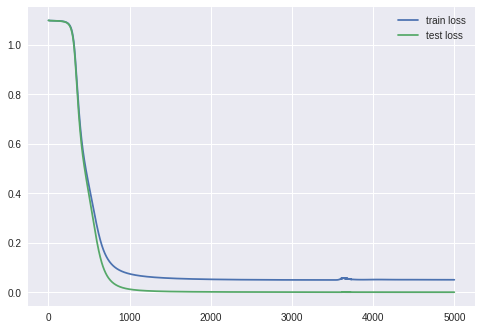

In [4]:
import tensorflow as tf
import numpy as np
import math as m
import matplotlib.pyplot as plt
import tensorflow.nn as nn
from sklearn import datasets

# data set up
iris = datasets.load_iris()
x_vals = np.array([x[0:4] for x in iris.data])
y_vals = np.array(iris.target)

# 80% for training, 20% for test
train_indices = np.array(np.hstack([np.linspace(0, 39, 40), np.linspace(50, 89, 40), np.linspace(100, 139, 40)]), dtype='int32')
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# Input Data Normalization (from -1 to 1)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# Model set-up
x_data = tf.placeholder(shape = [None, 4], dtype = tf.float32)
y_target = tf.placeholder(shape = [None], dtype = tf.int32)

H_nodes = 10

W1 = tf.Variable(tf.random_normal(shape = [4, H_nodes], mean=0.0, stddev=0.1))
b1 = tf.Variable(tf.random_normal(shape=[H_nodes], mean=0.0, stddev=0.1))

W2 = tf.Variable(tf.random_normal(shape=[H_nodes,H_nodes], mean=0.0, stddev=0.1))
b2 = tf.Variable(tf.random_normal(shape=[H_nodes], mean=0.0, stddev=0.1))

W3 = tf.Variable(tf.random_normal(shape=[H_nodes,3], mean=0.0, stddev=0.1))
b3 = tf.Variable(tf.random_normal(shape=[3], mean=0.0, stddev=0.1))

H_out= tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))
H_out2=tf.nn.relu(tf.add(tf.matmul(H_out,W2),b2))
L_out= tf.nn.relu(tf.add(tf.matmul(H_out2,W3),b3))

# loss and optimizer definition
#loss = tf.reduce_mean(tf.square(y_target-L_out))
loss= tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_target, logits=L_out))

optimizer = tf.train.GradientDescentOptimizer(0.1)
#optimizer = tf.train.AdamOptimizer(0.01)
train_op= optimizer.minimize(loss)

# Running session
sess= tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

loss_vec=[]
test_loss=[]
for i in range(5000):
    sess.run(train_op, feed_dict={x_data:x_vals_train, y_target:y_vals_train})
    temp_loss= sess.run(loss, feed_dict={x_data:x_vals_train, y_target:y_vals_train})
    loss_vec.append((temp_loss))
    test_temp_loss= sess.run(loss, feed_dict={x_data:x_vals_test, y_target:y_vals_test})
    test_loss.append((test_temp_loss))
    if (i+1)%100==0:
    	print(i+1, temp_loss, test_temp_loss)

plt.plot(loss_vec, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()

tout, tloss = sess.run([L_out, loss], feed_dict={x_data:x_vals_test, y_target:y_vals_test})

#print(tout)
#print(sess.run(tf.argmax(tout,axis=1)))
#print(y_vals_test)

